### ERNESTO ANDRÉS GONZÁLEZ LOMELÍ
### EXPEDIENTE 746843

# Comparación de Modelos de Clasificación para la Predicción de Contratación de Depósitos a Plazo Fijo 

### Objetivo General

Evaluar el desempeño de distintos modelos de clasificación supervisada (Regresión Logística, Máquinas de Vectores de Soporte y Redes Neuronales) mediante la optimización de hiperparámetros con procesos gaussianos, aplicados a un conjunto de datos específico.

### Objetivos Específicos
- Analizar un dataset real y comprender sus características fundamentales.
- Transformar las variables necesarias para su uso en modelos de clasificación.
- Implementar una Regresión Logística con regularización.
- Implementar una Máquina de Vectores de Soporte con kernel RBF.
- Implementar una Red Neuronal tipo Multi-layer Perceptron (MLP).
- Realizar la optimización de hiperparámetros mediante Optimización Bayesiana basada en procesos gaussianos.
- Comparar el desempeño de los modelos usando métricas de clasificación y validación cruzada.
- Concluir cuál modelo presenta mejor desempeño bajo las condiciones establecidas.

## Marco Teórico

### Regresión Logística
La regresión logística es un modelo de clasificación que estima la probabilidad de que una instancia pertenezca a una clase determinada. Utiliza la función logística (sigmoide) para mapear cualquier valor real al intervalo [0, 1]. Se entrena mediante la maximización de la verosimilitud y puede ser regularizada para evitar el sobreajuste, utilizando penalizaciones L1 (Lasso) o L2 (Ridge).

### Máquinas de Vectores de Soporte (SVM)
Las SVM son modelos supervisados que buscan encontrar un hiperplano óptimo que maximice el margen entre las clases. En casos no lineales, utilizan kernels para proyectar los datos a espacios de mayor dimensión, donde puedan ser separables linealmente. Son particularmente efectivas en espacios de alta dimensionalidad.

### Redes Neuronales (Multi-layer Perceptron)
Los MLP son redes neuronales artificiales que consisten en una capa de entrada, una o más capas ocultas y una capa de salida. Cada neurona aplica una función de activación y las conexiones entre neuronas tienen pesos que se ajustan durante el entrenamiento. Los MLP pueden modelar relaciones no lineales complejas.

### Kernels
Un kernel es una función que calcula el producto punto en un espacio transformado sin necesidad de computar explícitamente dicha transformación. Los kernels permiten a los algoritmos como SVM operar en espacios de características de mayor dimensión de forma eficiente. El kernel RBF (Radial Basis Function) es uno de los más comunes y permite manejar relaciones no lineales.

### Métricas para Clasificación

- Accuracy (Precisión): Proporción de predicciones correctas.
- Precision: Proporción de verdaderos positivos sobre los positivos predichos.
- Recall (Sensibilidad): Proporción de verdaderos positivos sobre los positivos reales.
- F1-score: Media entre precisión y recall.


### Hiperparámetros
Los hiperparámetros son parámetros definidos antes del entrenamiento del modelo, como la tasa de aprendizaje, número de capas, regularización, o el coeficiente del kernel en SVM. Su ajuste correcto es crucial para el buen desempeño del modelo.

### Optimización Bayesiana
La Optimización Bayesiana es una técnica de optimización global utilizada para ajustar hiperparámetros de modelos de machine learning. Emplea un modelo probabilístico (como un proceso gaussiano) para estimar la función de desempeño del modelo en función de los hiperparámetros, eligiendo nuevas combinaciones basándose en un criterio de adquisición (como Expected Improvement). Es eficiente cuando la evaluación del modelo es costosa o lenta.

## Análisis del dataset

El dataset utilizado en este proyecto es el Bank Marketing Dataset, proveniente del repositorio de aprendizaje automático de la Universidad de California en Irvine (UCI). Este conjunto de datos contiene información recolectada de campañas de marketing telefónico realizadas por una institución bancaria portuguesa con el objetivo de promover depósitos a plazo fijo.

### Qué contiene

El dataset está compuesto por 11,162 registros y 17 columnas, incluyendo tanto variables categóricas como numéricas. La variable objetivo es deposit, la cual indica si el cliente contrató (yes) o no (no) el producto ofrecido.

### Qué información proporcionan las muestras

Cada fila representa a un cliente, con datos relacionados a:

- Características personales: edad, ocupación, nivel educativo, estado civil, etc.

- Situación crediticia: balance de cuenta, préstamos personales, préstamos hipotecarios.

- Interacciones con campañas anteriores: número de contactos, duración de la última llamada, mes y día de contacto.

- Resultado de campañas anteriores.

### Qué variables se deben transformar

Las variables categóricas no pueden ser interpretadas directamente por modelos de machine learning. 
- Las siguientes columnas se transformarán mediante One-Hot Encoding:

job, marital, education, default, housing, loan, contact, month, poutcome

- Las variables numéricas se estandarizarán mediante StandardScaler:

age, balance, day, duration, campaign, pdays, previous

- La variable objetivo deposit se convierte a formato binario:

yes → 1, no → 0

### Qué se quiere analizar

El objetivo es predecir la probabilidad de que un cliente acepte una oferta de depósito a plazo fijo, considerando todas sus características y su historial de interacción con el banco.



### Qué resultados se podrían encontrar

A través de la aplicación de modelos de clasificación, se espera identificar qué variables son más relevantes para predecir la aceptación del producto. Esto puede ayudar a diseñar campañas más eficientes y segmentadas. También se podrá determinar qué modelo proporciona un mejor rendimiento en términos de F1-Score y estabilidad.

# CÓDIGO

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset
data = pd.read_csv('bank.csv')  
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
shape = data.shape
shape

(11162, 17)

In [4]:
dtypes = data.dtypes
dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [5]:
nulls = data.isnull().sum()
nulls

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
target_dist = data['deposit'].value_counts()
target_dist

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [7]:
describe = data.describe()
describe

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
numericas = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numericas.corr()

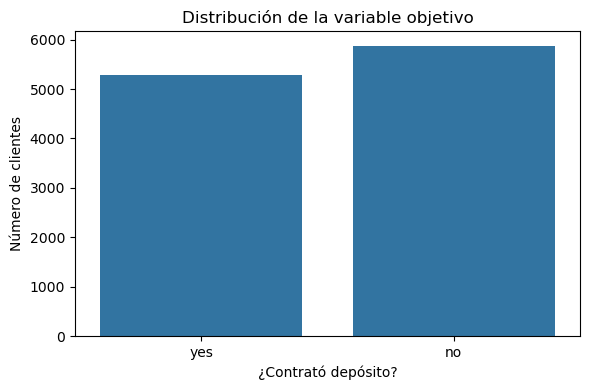

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', data=data)
plt.title('Distribución de la variable objetivo')
plt.xlabel('¿Contrató depósito?')
plt.ylabel('Número de clientes')
plt.tight_layout()
plt.show()


Aquí sabemos que está balanceada la variable objetivo

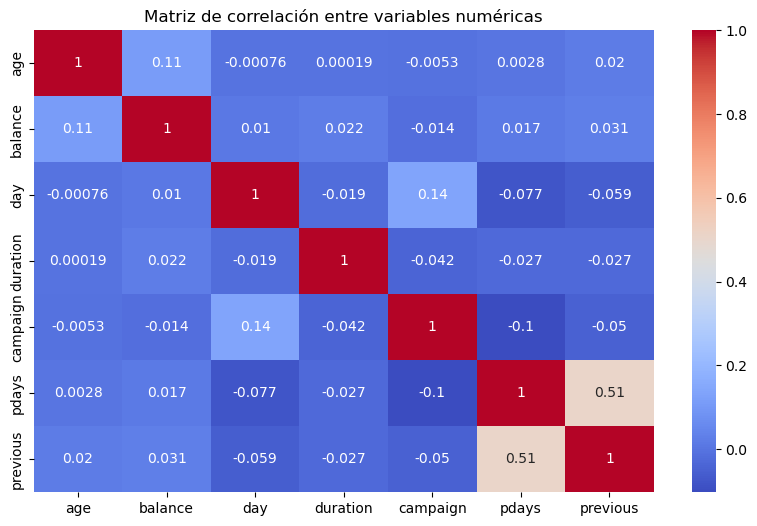

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
data['deposit']=data['deposit'].map({'yes': 1, 'no': 0})

In [13]:
x= data.drop('deposit', axis=1)
y =data['deposit']

In [14]:
categorical_cols=[
    'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month', 'poutcome'
]

In [15]:
numeric_cols = [
    'age', 'balance', 'day', 'duration',
    'campaign', 'pdays', 'previous'
]

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

In [17]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [18]:
X = pipeline.fit_transform(x)

### LOGISTIC REGRESION

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from skopt import BayesSearchCV
from skopt.space import Real
import numpy as np

In [20]:
log_reg = LogisticRegression(solver='liblinear')

In [21]:
param_space = {
    'C': Real(1e-4, 100, prior='log-uniform')
}

In [22]:
opt = BayesSearchCV(
    estimator=log_reg,
    search_spaces=param_space,
    n_iter=30,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

In [23]:
opt.fit(X, y)

BayesSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_iter=30,
              n_jobs=-1, random_state=42, scoring='f1',
              search_spaces={'C': Real(low=0.0001, high=100, prior='log-uniform', transform='normalize')})

In [24]:
print("Mejor parámetro encontrado:")
print(opt.best_params_)

Mejor parámetro encontrado:
OrderedDict({'C': 0.04666540870368648})


In [25]:
best_model = opt.best_estimator_
scores = cross_val_score(best_model, X, y, cv=5, scoring='f1')

In [26]:
print("\nF1-score promedio tras 5-Fold CV:", round(np.mean(scores), 4))
print("Desviación estándar:", round(np.std(scores), 4))


F1-score promedio tras 5-Fold CV: 0.7611
Desviación estándar: 0.0439


In [27]:
y_pred = best_model.predict(X)

In [28]:
print("Reporte de clasificación completo:")
print(classification_report(y, y_pred))

Reporte de clasificación completo:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      5873
           1       0.83      0.79      0.81      5289

    accuracy                           0.83     11162
   macro avg       0.83      0.82      0.83     11162
weighted avg       0.83      0.83      0.83     11162



### MODELO SVM

In [29]:
from sklearn.svm import SVC

In [30]:
svm = SVC(kernel='rbf')

In [31]:
param_space = {
    'C': Real(1e-3, 100, prior='log-uniform'),
    'gamma': Real(1e-4, 1, prior='log-uniform')
}

In [32]:
opt = BayesSearchCV(
    estimator=svm,
    search_spaces=param_space,
    n_iter=30,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

In [33]:
opt.fit(X, y)

BayesSearchCV(cv=5, estimator=SVC(), n_iter=30, n_jobs=-1, random_state=42,
              scoring='f1',
              search_spaces={'C': Real(low=0.001, high=100, prior='log-uniform', transform='normalize'),
                             'gamma': Real(low=0.0001, high=1, prior='log-uniform', transform='normalize')})

In [34]:
print("Mejores hiperparámetros encontrados:")
print(opt.best_params_)

Mejores hiperparámetros encontrados:
OrderedDict({'C': 0.5212131190318166, 'gamma': 0.47867076737948444})


In [35]:
best_model = opt.best_estimator_
scores = cross_val_score(best_model, X, y, cv=5, scoring='f1')

In [36]:
print("\nF1-score promedio tras 5-Fold CV:", round(np.mean(scores), 4))
print("Desviación estándar:", round(np.std(scores), 4))


F1-score promedio tras 5-Fold CV: 0.8024
Desviación estándar: 0.0402


In [37]:
y_pred = best_model.predict(X)
print("\nReporte de clasificación completo:\n")
print(classification_report(y, y_pred))


Reporte de clasificación completo:

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      5873
           1       0.88      0.95      0.91      5289

    accuracy                           0.91     11162
   macro avg       0.91      0.91      0.91     11162
weighted avg       0.92      0.91      0.91     11162



### Multi-layer perceptron

In [38]:
from sklearn.neural_network import MLPClassifier
from skopt.space import Real

In [39]:
hidden_layers = (20, 17, 8)

In [40]:
mlp = MLPClassifier(hidden_layer_sizes=hidden_layers,
    max_iter=1000,
    random_state=42
)

In [41]:
param_space = {
    'alpha': Real(1e-5, 1e-1, prior='log-uniform'),
    'learning_rate_init': Real(1e-4, 1e-1, prior='log-uniform')
}


In [42]:
# Búsqueda Bayesiana
opt = BayesSearchCV(
    estimator=mlp,
    search_spaces=param_space,
    n_iter=30,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

In [43]:
opt.fit(X, y)

BayesSearchCV(cv=5,
              estimator=MLPClassifier(hidden_layer_sizes=(20, 17, 8),
                                      max_iter=1000, random_state=42),
              n_iter=30, n_jobs=-1, random_state=42, scoring='f1',
              search_spaces={'alpha': Real(low=1e-05, high=0.1, prior='log-uniform', transform='normalize'),
                             'learning_rate_init': Real(low=0.0001, high=0.1, prior='log-uniform', transform='normalize')})

In [44]:
print("Mejores hiperparámetros encontrados:")
print(opt.best_params_)

Mejores hiperparámetros encontrados:
OrderedDict({'alpha': 0.1, 'learning_rate_init': 0.1})


In [45]:
best_model = opt.best_estimator_
scores = cross_val_score(best_model, X, y, cv=5, scoring='f1')

In [46]:
print("\nF1-score promedio tras 5-Fold CV:", round(np.mean(scores), 4))
print("Desviación estándar:", round(np.std(scores), 4))


F1-score promedio tras 5-Fold CV: 0.8085
Desviación estándar: 0.0325


In [47]:
y_pred = best_model.predict(X)
print("\nReporte de MLP:\n")
print(classification_report(y, y_pred))



Reporte de MLP:

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      5873
           1       0.78      0.93      0.85      5289

    accuracy                           0.84     11162
   macro avg       0.85      0.84      0.84     11162
weighted avg       0.85      0.84      0.84     11162



In [48]:
import matplotlib.pyplot as plt

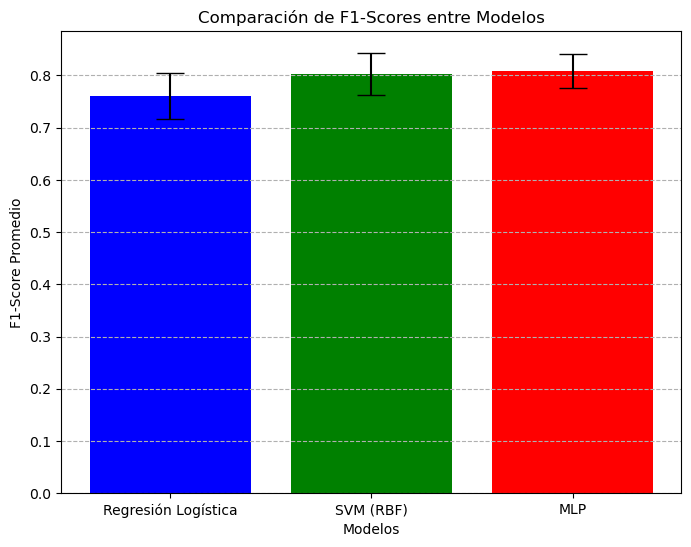

In [49]:
modelos = ['Regresión Logística', 'SVM (RBF)', 'MLP']
f1_scores = [0.7611, 0.8024, 0.8085]
desviaciones = [0.0439, 0.0402, 0.0325]

colores = ['blue', 'green', 'red']

plt.figure(figsize=(8, 6))
bars = plt.bar(modelos, f1_scores, yerr=desviaciones, capsize=10, color=colores)

plt.xlabel('Modelos')
plt.ylabel('F1-Score Promedio')
plt.title('Comparación de F1-Scores entre Modelos')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

### CONCLUSIÓN

En el presente proyecto se evaluaron tres modelos de clasificación supervisada con el objetivo de predecir si un cliente contratará un depósito a plazo fijo. Los modelos implementados fueron la **Regresión Logística con regularización**, la **Máquina de Vectores de Soporte (SVM) con kernel RBF** y el **Multi-Layer Perceptron (MLP)**, cada uno optimizado mediante **Optimización Bayesiana** para ajustar sus hiperparámetros de manera eficiente.

Tras la validación cruzada con 5 folds, los resultados obtenidos fueron los siguientes:

- **Regresión Logística**: F1-Score promedio de **0.7611** con una desviación estándar de **0.0439**.
- **SVM**: F1-Score promedio de **0.8024** con una desviación estándar de **0.0402**.
- **MLP**: F1-Score promedio de **0.8085** con una desviación estándar de **0.0325**.

El modelo **MLP** obtuvo el mejor desempeño con un F1-Score de **0.8085** y presentó la menor variabilidad en sus predicciones, lo que lo convierte en la opción más adecuada para este problema. Su capacidad para modelar relaciones no lineales complejas, junto con la estabilidad evidenciada por la baja desviación estándar, respalda esta elección.

Por otro lado, la **SVM** también mostró un rendimiento competitivo, logrando un F1-Score cercano al del MLP. Esta opción podría ser preferida en escenarios donde el tiempo de cómputo o los recursos computacionales sean limitados, o cuando se requiera un mayor grado de interpretabilidad.

Finalmente, la **Regresión Logística** mostró un desempeño inferior en comparación con los otros modelos, lo cual era esperado debido a su naturaleza lineal. Sin embargo, sigue siendo una opción válida cuando se busca un modelo más simple y explicativo.

En conclusión, la implementación de **Optimización Bayesiana** permitió encontrar los hiperparámetros óptimos de cada modelo, demostrando su eficacia en la mejora del rendimiento. Con base en los resultados obtenidos, el modelo **MLP** como la solución más efectiva.


## REFERENCIAS

Head, T., MechCoder, Louppe, G., Shcherbatyi, I., & others. (2023). Scikit-Optimize: Bayesian Optimization in Python. GitHub Repository.
Disponible en: https://scikit-optimize.github.io/stable/

Scikit-Optimize Developers. (2023). BayesSearchCV - Scikit-Optimize Documentation.
Disponible en: https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html

Scikit-Optimize Developers. (2023). Real - Scikit-Optimize Documentation.
Disponible en: https://scikit-optimize.github.io/stable/modules/generated/skopt.space.Real.html

Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer. https://www.springer.com/gp/book/9780387310732

Cortes, C., & Vapnik, V. (1995). Support-vector networks. Machine Learning, 20(3), 273–297. https://link.springer.com/article/10.1007/BF00994018

Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (2nd ed.). O'Reilly Media. https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/

Murphy, K. P. (2012). Machine Learning: A Probabilistic Perspective. MIT Press. https://mitpress.mit.edu/9780262018029/machine-learning/

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830. http://jmlr.org/papers/v12/pedregosa11a.html

Raschka, S., & Mirjalili, V. (2019). Python Machine Learning (3rd ed.). Packt Publishing. https://www.packtpub.com/product/python-machine-learning-third-edition/9781789955750

Snoek, J., Larochelle, H., & Adams, R. P. (2012). Practical Bayesian Optimization of Machine Learning Algorithms. In Proceedings of the 25th International Conference on Neural Information Processing Systems (pp. 2951–2959). https://papers.nips.cc/paper_files/paper/2012/hash/05311655a15b75fab86956663e1819cd-Abstract.html

### Referencias sobre librerías que usé